<a href="https://colab.research.google.com/github/MohamadMahdiDarvishi/Tensorflow/blob/main/Notebooks/Tensorflow_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with TensorFlow Part 2: Fine-tuning

## 0. Prerequirities

In [ ]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import os
import pathlib
import random

In [ ]:
# using a GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Downloading and Importing helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data , plot_loss_curves , create_tensorboard_callback , walk_through_dir

--2023-09-03 05:17:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-03 05:17:58 (74.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



**Note :** we could use our own helper function on our own github page but because of saving time we use a pre-made one from daniel bourke github page

## 1. Prepare data

###**Get Data**

In [ ]:
# Download and unzip 10% of data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-09-03 05:17:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   116MB/s    in 1.4s    

2023-09-03 05:18:01 (116 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Download and unzip 100% of data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data("10_food_classes_all_data.zip")

--2023-09-03 05:18:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   142MB/s    in 3.4s    

2023-09-03 05:18:07 (144 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



###**Walk Through Data**

In [ ]:
# walk through 10% directory
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [ ]:
# walk through 100% directory
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

###**make train and test data**

In [ ]:
# 10 % train and test directories
train_dir_10 = "10_food_classes_10_percent/train"
test_dir_10 = "10_food_classes_10_percent/test"

In [ ]:
# 100% train and test data
train_dir_100 = "10_food_classes_all_data/train"
test_dir_100 = "10_food_classes_all_data/test"

In [ ]:
# 10% data
#train
train_data_10 = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10 ,
                                                                    batch_size = 32 ,
                                                                    label_mode = "categorical" ,
                                                                    image_size = (224,224))
# test
test_data_10 = tf.keras.preprocessing.image_dataset_from_directory(directory= test_dir_10,
                                                               batch_size = 32 ,
                                                               label_mode = "categorical",
                                                               image_size = (224,224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# 100% Data
#train
train_data_100 = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir_100 ,
                                                                     batch_size = 32 ,
                                                                     label_mode = "categorical" ,
                                                                     image_size = (224,224))
# test
test_data_100 = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir_100,
                                                                    batch_size = 32 ,
                                                                    label_mode = "categorical" ,
                                                                    image_size = (224,224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


###**A Glance at our data**

In [ ]:
train_data_10.class_names == train_data_100.class_names

True

In [ ]:
train_data_10.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
print(f"the train data shape is : {train_data_10.take(0).element_spec[0].shape}")
print(f"the test data shape is : {test_data_10.take(0).element_spec[0].shape}")

the train data shape is : (None, 224, 224, 3)
the test data shape is : (None, 224, 224, 3)


❗ **Note :**

**data augmentation** in this notebook is explained in build model section and it is beacuse it operates by : `tf.keras.layers.exprimental.preprocessing()`

## 2. Build model

in this nootebook we are going to use pre-trained models within `tf.keras.applications` and apply them to our own problem in other word we are going to use Functional API insted of Sequential API .

❗ **Note**

Sequential API runs our model layers straight-forward in sequential order but Functional API give us more flexibility in runing models


🔌 models we are going to create :

>* `model_0` - Feature Extraction model - train for 5 epochs on 10% of data with with data augmentation
* `model_1` - Fine-tuned same model - train for **further** 5 epochs on 10% of data with data augmentation (unfrozen layers)
* `model_2` - Fine-tuned model initiam model - train for 5 **further** epochs on **100%** of data with data augmentation (unfozen layers again)

⚡ **Adding data Augmentation into model**


to add data augmentation to our model we use `tf.keras.layers.exprimental.preprocessing()` by using a Sequential API inside that

there is benefits of using data augmentation inside model :

* the process happens on the GPU (much faster process)
* data augmentation only happens inside model training and we could use the main data in other models

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

# creating data augmentation layer
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal") ,
    preprocessing.RandomRotation(0.2) ,
    preprocessing.RandomZoom(0.2) ,
    preprocessing.RandomHeight(0.2) ,
    preprocessing.RandomWidth(0.2)
] , name  = "data_augmentation")

❗ **Note**  

models like EfficientNetB0 doesn't need rescaling but we must add rescaling for ResNet50V2

In [ ]:
list((iter(train_data_10)))[0][0].shape , list((iter(train_data_10)))[0][1].shape

(TensorShape([32, 224, 224, 3]), TensorShape([32, 10]))

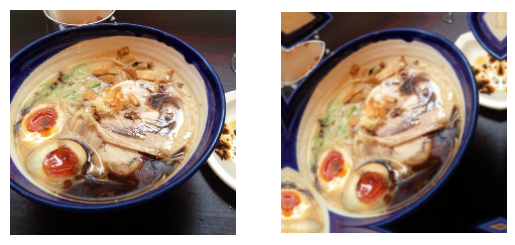

In [ ]:
# visualizing augmented data
img = list(iter(train_data_10))[0][0][0]/255.0 ;
plt.subplot(1,2,1) ;
plt.imshow(img) ;
plt.axis("off") ;
plt.subplot(1,2,2) ;
plt.imshow(data_augmentation(img)) ;
plt.axis("off") ;

### **`model_0`**

feature extraction model

In [ ]:
# Create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create model layers
inputs  = tf.keras.layers.Input(shape = (224,224,3) , name = "input_layer")  # create input layer
x = data_augmentation(inputs) # adding augmentation layer
x = base_model(x , training = False) # passing augmented data to model in inference model (freezing patterns  learned)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_2d")(x) # taking feature vector of model
outputs = tf.keras.layers.Dense(10 , activation = "softmax" , name = "output_layer")(x) # create output layer
model_0 = tf.keras.Model(inputs , outputs)

# compile model
model_0.compile(loss = tf.keras.losses.categorical_crossentropy ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"])

16705208/16705208 [==============================] - 0s 0us/step


**Create ModelCheckpoint callback**

ModelCheckpoint saves models state per epochs so we can access the last weights and model state and continue from where our model training interupted

In [ ]:
# setting checkpoint path
checkpoint_path = "feature_extraction_10/checkpoint.ckpt"

# creating callback function
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path ,
                                                         save_freq = "epoch",
                                                         save_best_only = False ,
                                                         save_weights_only = True)

In [ ]:
# fit model

results_0 = model_0.fit(epochs = 5 ,
                        x = train_data_10 ,
                        steps_per_epoch = len(train_data_10) ,
                        validation_data = test_data_10 ,
                        validation_steps = len(test_data_10) ,
                        callbacks = [create_tensorboard_callback(dir_name = "tensorboards" ,
                                                                 experiment_name = "transfer_learning_10") ,
                                     checkpoint_callback])

Saving TensorBoard log files to: tensorboards/transfer_learning_10/20230903-051832
Epoch 1/5
24/24 [==============================] - 289s 12s/step - loss: 1.9815 - accuracy: 0.3667 - val_loss: 1.3990 - val_accuracy: 0.7164
Epoch 2/5
24/24 [==============================] - 296s 13s/step - loss: 1.2856 - accuracy: 0.7067 - val_loss: 0.9700 - val_accuracy: 0.7992
Epoch 3/5
24/24 [==============================] - 316s 14s/step - loss: 0.9975 - accuracy: 0.7560 - val_loss: 0.7718 - val_accuracy: 0.8268
Epoch 4/5
24/24 [==============================] - 274s 12s/step - loss: 0.8050 - accuracy: 0.8080 - val_loss: 0.6762 - val_accuracy: 0.8360
Epoch 5/5
24/24 [==============================] - 295s 13s/step - loss: 0.7389 - accuracy: 0.8120 - val_loss: 0.6198 - val_accuracy: 0.8460


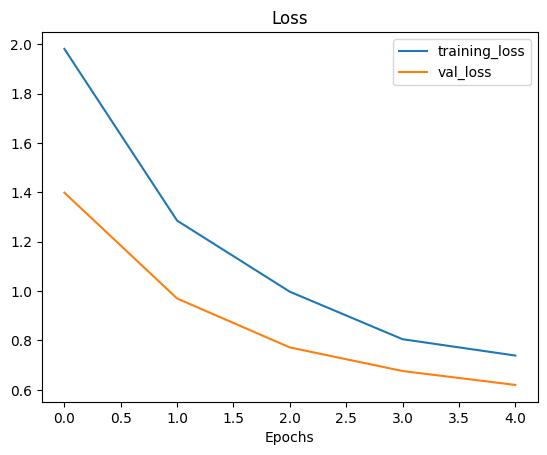

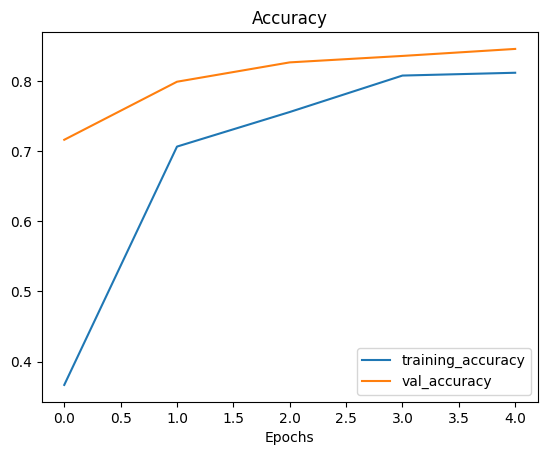

In [ ]:
plot_loss_curves(results_0)

In [ ]:
model_0.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_0 , show_shape = True)

**Loading checkpoint weights**

In [ ]:
# trained moddel results
model_0_normal_result = model_0.evaluate(test_data_10)

# loading saved model patterns (weights)
model_0_loaded_weights = model_0.load_weights(checkpoint_path)

# make evaluation on model with loaded weights
model_0_loaded_weights_results = model_0.evaluate(test_data_10)

# checking equality of model metrics
np.isclose(np.array(model_0_normal_result) , np.array(model_0_loaded_weights_results))

79/79 [==============================] - 220s 3s/step - loss: 0.6198 - accuracy: 0.8460


array([ True,  True])

**GlobalAveragePooling2D layer**

getting feature vector from model and a glance at its influence on tensor shape

In [ ]:
# set seed
random.seed(42)

# make a random tensor
input_shape = (1,2,3,4)
random_tensor = tf.constant(np.random.randint(low = 0 , high = 10 , size = input_shape))

# passing data to global average pooling 2d
global_average_pooling_tensor = tf.keras.layers.GlobalAveragePooling2D()(random_tensor)

# printing out results
print(f"random tensor shape : {random_tensor.shape}")
print(f"data passed layer shape : {global_average_pooling_tensor.shape}")

random tensor shape : (1, 2, 3, 4)
data passed layer shape : (1, 4)


### `model_1`

fine-tuning an existing model on 10% data

In [ ]:
for layer in model_0.layers :
  print(layer , layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7e0eecfb7fa0> True
<keras.engine.sequential.Sequential object at 0x7e0eed76cfd0> True
<keras.engine.functional.Functional object at 0x7e0eed06ee00> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7e0eed4f2110> True
<keras.layers.core.dense.Dense object at 0x7e0eed4f2260> True


In [ ]:
for i , layer in enumerate(model_0.layers[2].layers) :
  print(i , layer.name , layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

**Fine-tunning**

actully what happens in fine-tunning is making some layer trainable (unfreezing some layers) or in other world giving our model more opurtunities for learning

In [ ]:
base_model == model_0.layers[2] , len(base_model.layers) == len(model_0.layers[2].layers)

(True, True)

In [ ]:
# making last 10 base model (efficientnetB0) layers trinable
for layer in base_model.layers[-10:] :
  layer.trainable = True

In [ ]:
print(len(model_0.trainable_variables))

2


In [ ]:
# compile model
model_0.compile(loss = tf.keras.losses.categorical_crossentropy ,
                optimizer = tf.keras.optimizers.Adam(lr= 0.001) ,
                metrics = ["accuracy"])

❗ **Note**

> ✅ we recompile our model every time we make a change

> ✅ when doing fine-tunning it's recommended to lower learning rate as much as possible

In [ ]:
# fit model with fine-tunning
results_fine_10 = model_0.fit(epochs = 10 ,
                              x = train_data_10 ,
                              validation_data = test_data_10 ,
                              steps_per_epoch = len(train_data_10) ,
                              validation_steps = len(test_data_10) ,
                              initial_epoch = results_0.epoch[-1],  # starting from last epoch of model
                              callbacks = [create_tensorboard_callback(dir_name = "tensorboards" ,
                                                                       experiment_name = "fine-tunning-10")])

Saving TensorBoard log files to: tensorboards/fine-tunning-10/20230903-065838
Epoch 5/10
24/24 [==============================] - 262s 11s/step - loss: 0.6579 - accuracy: 0.8360 - val_loss: 0.5763 - val_accuracy: 0.8540
Epoch 6/10
24/24 [==============================] - 276s 12s/step - loss: 0.5977 - accuracy: 0.8413 - val_loss: 0.5510 - val_accuracy: 0.8536
Epoch 7/10
24/24 [==============================] - 313s 13s/step - loss: 0.5619 - accuracy: 0.8613 - val_loss: 0.5213 - val_accuracy: 0.8604
Epoch 8/10
24/24 [==============================] - 330s 14s/step - loss: 0.5223 - accuracy: 0.8760 - val_loss: 0.5039 - val_accuracy: 0.8616
Epoch 9/10
24/24 [==============================] - 347s 15s/step - loss: 0.4880 - accuracy: 0.8680 - val_loss: 0.4919 - val_accuracy: 0.8628
Epoch 10/10
24/24 [==============================] - 334s 14s/step - loss: 0.4649 - accuracy: 0.8840 - val_loss: 0.4788 - val_accuracy: 0.8664


**Note :**
`plot_loss_curves` only works for models that trained once and doesn't show further trains so we create another model for our gool

In [ ]:
def plot_loss_fine_tunning(original_result , further_results , initial_epoch = 5) :
  # accuracy train
  acc_original = original_result.history["accuracy"]
  acc_further = further_results.history["accuracy"]
  acc_train = acc_original + acc_further
  # accuracy test
  val_acc_original = original_result.history["val_accuracy"]
  val_acc_further = further_results.history["val_accuracy"]
  acc_test = val_acc_original + val_acc_further
  # loss train
  loss_original = original_result.history["loss"]
  loss_further = further_results.history["loss"]
  loss_train = loss_original + loss_further
  # loss test
  val_loss_original = original_result.history["val_loss"]
  val_loss_further = further_results.history["val_loss"]
  loss_test = val_loss_original + val_loss_further

  # visualize
  plt.figure(figsize = (15,5))
  # training and validation accuracy
  plt.subplot(1,2,1) ;
  plt.plot(acc_train , label = "train_acc") ;
  plt.plot(acc_test , label = "val_acc") ;
  plt.plot([initial_epoch , initial_epoch] , plt.ylim() , label = "start fine tunning") ;
  plt.legend() ;
  plt.title("training and validation accuracy") ;
  # training and validation loss
  plt.subplot(1,2,2) ;
  plt.plot(loss_train , label = "train_loss") ;
  plt.plot(loss_test , label = "val_loss") ;
  plt.plot([initial_epoch , initial_epoch] , plt.ylim() , label = "start fine tunning") ;
  plt.legend() ;
  plt.title("training and validation loss") ;

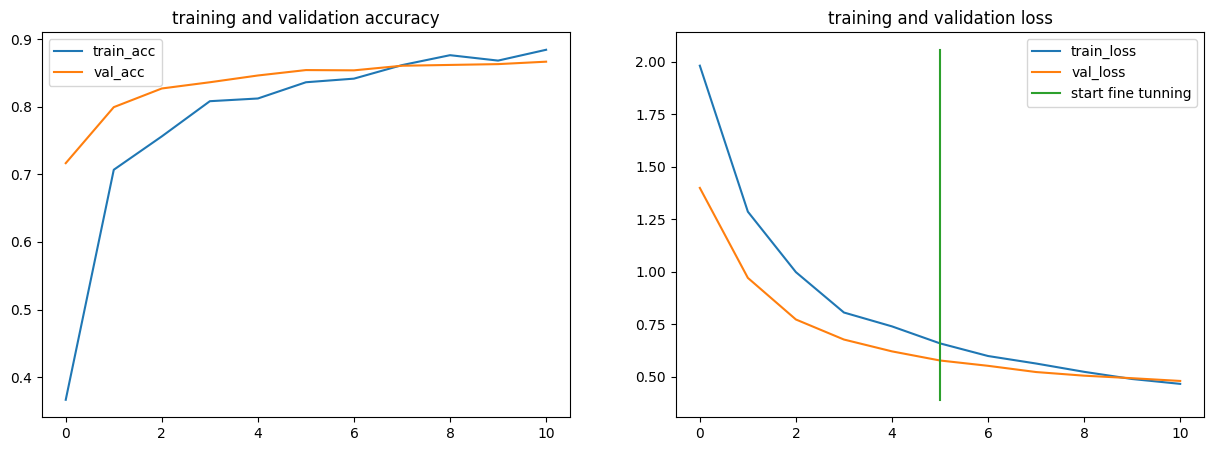

In [ ]:
plot_loss_fine_tunning(original_result = results_0 ,
                       further_results = results_fine_10 ,
                       initial_epoch = 5)

### `model_2`

 fine-tunning on all of data

**Revert back model**

as we do fine-tunning on transfer extraction model to do fine-tunning on all of data we need to revert back model_1 to model_0

In [ ]:
# load weights
model_0.load_weights(checkpoint_path)

In [ ]:
# checking equality of results
loaded_results = model_0.evaluate(test_data_10)
np.isclose(np.array(model_0_normal_result) , np.array(loaded_results))

79/79 [==============================] - 223s 3s/step - loss: 0.6198 - accuracy: 0.8460


array([ True,  True])

In [ ]:
# checking trinable layers of model
for i , layer in enumerate(model_0.layers[2].layers[-10:]) :
  print(i , layer.name , layer.trainable)

0 block7a_se_squeeze True
1 block7a_se_reshape True
2 block7a_se_reduce True
3 block7a_se_expand True
4 block7a_se_excite True
5 block7a_project_conv True
6 block7a_project_bn True
7 top_conv True
8 top_bn True
9 top_activation True


**recompile and fit model**

In [ ]:
# compile model
model_0.compile(loss = tf.keras.losses.categorical_crossentropy ,
                optimizer = tf.keras.optimizers.Adam(0.001) ,
                metrics = ["accuracy"])

In [ ]:
# fit model
results_fine_100 = model_0.fit(x = train_data_100 ,
                               epochs = 10 ,
                               steps_per_epoch = len(train_data_100) ,
                               validation_data = test_data_100 ,
                               validation_steps = len(test_data_100) ,
                               initial_epoch = results_0.epoch[-1],
                               callbacks = [create_tensorboard_callback(dir_name = "tensorboard" ,
                                                                        experiment_name = "fine_tunning_100")])

Saving TensorBoard log files to: tensorboard/fine_tunning_100/20230903-075951


Epoch 5/10
235/235 [==============================] - 878s 4s/step - loss: 0.8076 - accuracy: 0.7651 - val_loss: 0.5530 - val_accuracy: 0.8576
Epoch 6/10
235/235 [==============================] - 803s 3s/step - loss: 0.7501 - accuracy: 0.7769 - val_loss: 0.5108 - val_accuracy: 0.8640
Epoch 7/10
235/235 [==============================] - 791s 3s/step - loss: 0.7096 - accuracy: 0.7897 - val_loss: 0.4824 - val_accuracy: 0.8700
Epoch 8/10
235/235 [==============================] - 772s 3s/step - loss: 0.6805 - accuracy: 0.7976 - val_loss: 0.4616 - val_accuracy: 0.8712
Epoch 9/10
235/235 [==============================] - 794s 3s/step - loss: 0.6545 - accuracy: 0.8060 - val_loss: 0.4434 - val_accuracy: 0.8744
Epoch 10/10
235/235 [==============================] - 800s 3s/step - loss: 0.6414 - accuracy: 0.8076 - val_loss: 0.4307 - val_accuracy: 0.8756


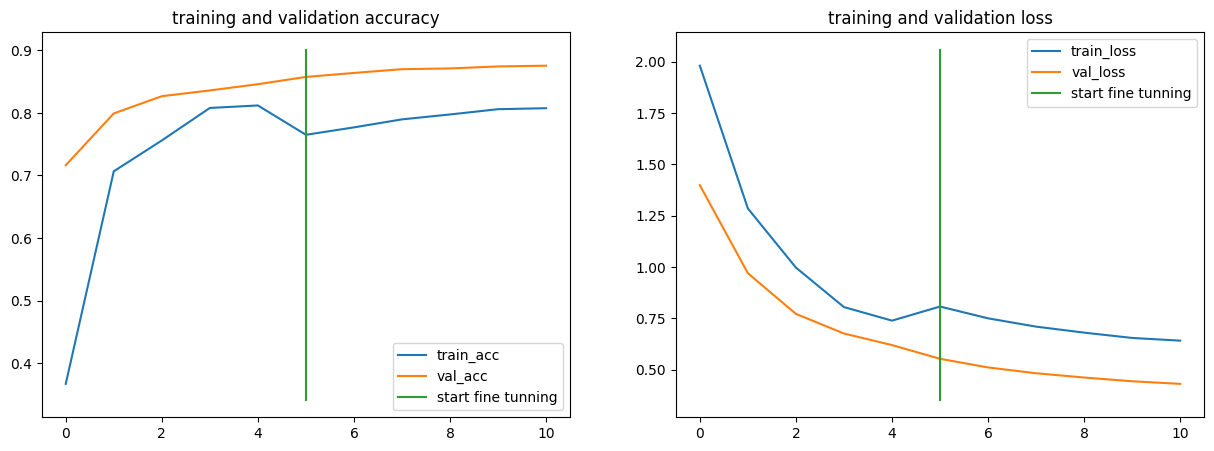

In [ ]:
plot_loss_fine_tunning(original_result = results_0 ,
                       further_results = results_fine_100 ,
                       initial_epoch = 5)

## view our expriments data on TensorBoard

In [ ]:
!tensorboard dev upload --logdir ./tensorboard \
  --name "transfer learning with fine tunning" \
  --description "doing fine tunning on 10% and 100% of 10 classes of foof101 classes" \
  --one_shot # exits the tensorboard uploader once it finished uploading

2023-09-03 09:36:10.995798: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/lDHegysrRM2FwYkV6GDiKw/

[2023-09-03T09:36:13] Started scanning logdir.
[2023-09-03T09:36:14] Total uploaded: 36 scalars, 0 tensors, 1 binary objects (866.1 kB)
[2023-09-03T09:36:14] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/lDHegysrRM2FwYkV6GDiKw/


In [ ]:
# looking at uploads at tensorboard
!tensorboard dev list

2023-09-03 09:36:25.169681: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/lDHegysrRM2FwYkV6GDiKw/
	Name                 transfer learning with fine tunning
	Description          doing fine tunning on 10% and 100% of 10 classes of foof101 classes
	Id                   lDHegysrRM2FwYkV6GDiKw
	Created              2023-09-03 09:36:13 (15 seconds ago)
	Updated              2023-09-03 09:36:14 (14 seconds ago)
	Runs                 2
	Tags                 5
	Scalars              36
	Tensor bytes         0
	Binary object bytes  887005
https://tensorboard.dev/experiment/xx5BuaHLQjiO7etRDeuoRw/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two diffrent tensorflow hub feature extraction layer model architecture with 10% of 101 food data set
	Id                   xx5BuaHLQjiO7etRDeuoRw
	Created              2023-09-01 11:22:29
	Updated              2023-09-01 11:22:34
	Runs 